# Assignment 4 - Ken Wood

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Set up the programming enviroment

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import pandas as pd
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the data...


Specify the directory path where the data is located...

In [0]:
mean_temps = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Plotting Assignment - Week 4/Ann Arbor Temps weather.gov .xlsx',sheet_name='Mean Temp',header=1,skiprows=list(range(2,31)))
max_temps = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Plotting Assignment - Week 4/Ann Arbor Temps weather.gov .xlsx',sheet_name='Max Temp',header=1,skiprows=list(range(2,31)))
min_temps = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Plotting Assignment - Week 4/Ann Arbor Temps weather.gov .xlsx',sheet_name='Min Temp',header=1,skiprows=list(range(2,31)))
temp_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Plotting Assignment - Week 4/ann arbor weather 1891-2020.csv')

Merge the 'mean_temp', 'min_temp' and 'max_temp' datasets on 'Year'. Set 'Year' as the row index. Replace missing values 'M' with NaN and change all variable types to float64.


In [0]:
temps = mean_temps.merge(min_temps,how='inner',on='Year')
temps = temps.merge(max_temps,how='inner',on='Year')
temps.drop(labels=['Annual','Annual_x','Annual_y'],axis=1,inplace=True)
temps = temps[temps['Year'] != 'Mean']
# temps.set_index(['Year'],drop=True,inplace=True)
temps.replace(to_replace='M',value=np.nan,inplace=True)
temps.astype('float64')

,Year,Jan Mean,Feb Mean,Mar Mean,Apr Mean,May Mean,Jun Mean,Jul Mean,Aug Mean,Sep Mean,Oct Mean,Nov Mean,Dec Mean,Jan Min,Feb Min,Mar Min,Apr Min,May Min,Jun Min,Jul Min,Aug Min,Sep Min,Oct Min,Nov Min,Dec Min,Jan Max,Feb Max,Mar Max,Apr Max,May Max,Jun Max,Jul Max,Aug Max,Sep Max,Oct Max,Nov Max,Dec Max
0,1900.0,26.3,19.8,24.7,47.8,60.2,66.3,72.0,75.4,67.2,59.0,37.6,29.2,-7.0,-7.0,-5.0,22.0,29.0,45.0,47.0,52.0,36.0,26.0,15.0,5.0,50.0,63.0,47.0,81.0,87.0,90.0,96.0,98.0,94.0,89.0,66.0,54.0
1,1901.0,23.8,15.3,31.4,47.3,57.0,69.0,76.6,72.0,63.4,52.2,35.2,23.1,-7.0,-4.0,-1.0,26.0,34.0,37.0,51.0,49.0,35.0,26.0,12.0,-11.0,48.0,33.0,70.0,84.0,85.0,95.0,97.0,94.0,93.0,79.0,60.0,59.0
2,1902.0,22.7,20.4,38.9,46.3,58.6,63.7,72.1,67.0,61.2,51.1,45.1,24.8,-4.0,-7.0,8.0,23.0,31.0,42.0,47.0,44.0,36.0,27.0,18.0,2.0,41.0,54.0,69.0,83.0,90.0,87.0,91.0,88.0,85.0,75.0,70.0,44.0
3,1903.0,22.6,24.0,41.5,45.9,59.2,62.5,71.1,66.1,62.0,51.8,35.1,20.9,-7.0,-10.0,12.0,18.0,25.0,43.0,45.0,45.0,35.0,23.0,10.0,-2.0,50.0,48.0,77.0,79.0,88.0,87.0,92.0,86.0,89.0,78.0,73.0,40.0
4,1904.0,14.4,14.0,32.5,41.4,58.0,66.8,70.8,67.4,62.4,49.5,39.4,23.0,-11.0,-12.0,11.0,18.0,32.0,45.0,45.0,46.0,31.0,23.0,12.0,-4.0,38.0,46.0,63.0,77.0,88.0,90.0,97.0,88.0,87.0,79.0,69.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016.0,26.7,31.3,43.1,46.9,60.2,70.5,75.3,75.5,68.0,56.3,46.2,28.3,6.0,-1.0,15.0,17.0,34.0,46.0,50.0,56.0,47.0,32.0,20.0,2.0,51.0,62.0,70.0,83.0,88.0,92.0,95.0,94.0,92.0,83.0,77.0,53.0
117,2017.0,30.4,37.5,36.8,54.1,58.7,70.6,72.8,68.0,64.4,55.8,38.7,24.6,2.0,6.0,12.0,31.0,31.0,47.0,47.0,43.0,37.0,28.0,16.0,-17.0,58.0,68.0,76.0,83.0,88.0,92.0,90.0,88.0,92.0,85.0,65.0,57.0
118,2018.0,23.6,29.3,33.5,41.4,64.6,69.2,72.1,72.8,66.3,50.7,34.4,32.0,-13.0,-3.0,15.0,14.0,38.0,41.0,44.0,49.0,36.0,23.0,11.0,8.0,55.0,63.0,57.0,74.0,94.0,95.0,93.0,90.0,91.0,85.0,54.0,57.0
119,2019.0,22.9,26.6,32.5,48.7,57.8,66.1,74.1,69.6,66.5,52.0,33.8,32.9,-18.0,-7.0,1.0,20.0,32.0,38.0,52.0,46.0,42.0,28.0,-3.0,2.0,53.0,53.0,68.0,72.0,85.0,90.0,94.0,87.0,87.0,86.0,55.0,57.0


In [0]:
temps['Winter Max'] = (temps['Dec Max'] + temps['Jan Max'] + temps['Feb Max'])/3
temps['Spring Max'] = (temps['Mar Max'] + temps['Apr Max'] + temps['May Max'])/3
temps['Summer Max'] = (temps['Jun Max'] + temps['Jul Max'] + temps['Aug Max'])/3
temps['Autumn Max'] = (temps['Sep Max'] + temps['Oct Max'] + temps['Nov Max'])/3

In [0]:
temps['Winter Mean'] = (temps['Dec Mean'] + temps['Jan Mean'] + temps['Feb Mean'])/3
temps['Spring Mean'] = (temps['Mar Mean'] + temps['Apr Mean'] + temps['May Mean'])/3
temps['Summer Mean'] = (temps['Jun Mean'] + temps['Jul Mean'] + temps['Aug Mean'])/3
temps['Autumn Mean'] = (temps['Sep Mean'] + temps['Oct Mean'] + temps['Nov Mean'])/3

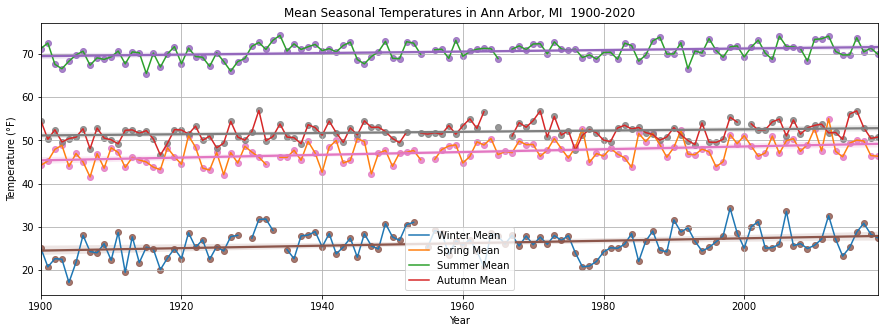

In [0]:
temps.plot(x ='Year', y=['Winter Mean','Spring Mean','Summer Mean','Autumn Mean'],figsize=(15,5),grid=True)
plt.title("Mean Seasonal Temperatures in Ann Arbor, MI  1900-2020")
sns.regplot(x='Year',y ='Summer Mean',data=temps, fit_reg=True) 
sns.regplot(x='Year',y ='Winter Mean',data=temps, fit_reg=True) 
sns.regplot(x='Year',y ='Spring Mean',data=temps, fit_reg=True) 
sns.regplot(x='Year',y ='Autumn Mean',data=temps, fit_reg=True) 
plt.ylabel("Temperature (°F)")
plt.xlabel("Year")
plt.show()

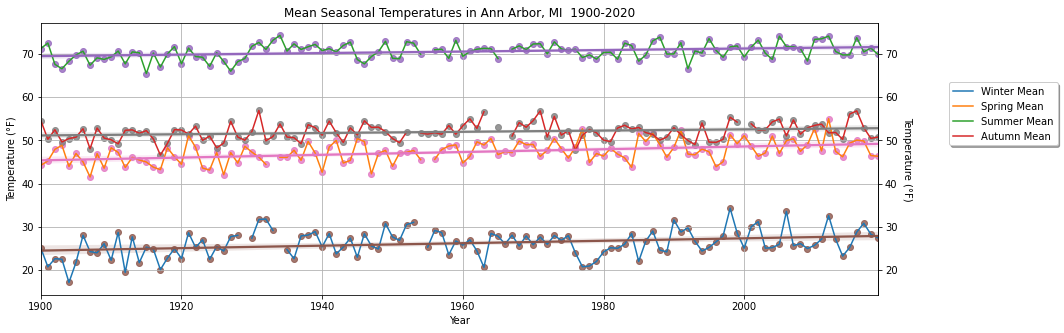

In [0]:
fig, ax = plt.subplots(figsize=(25,5))
x = temps['Year']
cols = ['Winter Mean','Spring Mean','Summer Mean','Autumn Mean']
y = temps[cols]
ax.plot(x, y)
ax.grid()
ax.set_xlabel('Year')
ax.set_title('Mean Seasonal Temperatures in Ann Arbor, MI  1900-2020')
secax = ax.secondary_yaxis('right')
secax.set_ylabel('Temperature (°F)',rotation = 270,labelpad=15)
sns.regplot(x='Year',y ='Summer Mean',data=temps, fit_reg=True) 
sns.regplot(x='Year',y ='Winter Mean',data=temps, fit_reg=True) 
sns.regplot(x='Year',y ='Spring Mean',data=temps, fit_reg=True) 
sns.regplot(x='Year',y ='Autumn Mean',data=temps, fit_reg=True)
ax.set_ylabel('Temperature (°F)')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(y,loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
plt.show()